## Goal: Predict trip count for 10 stations

#### - import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from neuralprophet import NeuralProphet, set_log_level
from neuralprophet import set_random_seed
set_random_seed(10)
set_log_level("ERROR", "INFO")

#### - data import & create list of 10 stations

In [5]:
df_wdc = pd.read_csv('./region_wise_data/df_wdc.csv')

In [6]:
df_wdc = df_wdc.fillna(value= 0)

In [7]:
df_wdc.loc[:, df_wdc.columns != 'ds'].astype(float)

,31100.0,31101.0,31102.0,31103.0,31104.0,31105.0,31106.0,31107.0,31108.0,31109.0,...,31817.0,31818.0,31819.0,31820.0,31822.0,31823.0,31824.0,31825.0,31826.0,31827.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100304,0.0,7.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
100305,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100306,1.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100307,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
df_wdc

,ds,31100.0,31101.0,31102.0,31103.0,31104.0,31105.0,31106.0,31107.0,31108.0,...,31817.0,31818.0,31819.0,31820.0,31822.0,31823.0,31824.0,31825.0,31826.0,31827.0
0,2010-09-20 11:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2010-09-20 12:00:00,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2010-09-20 13:00:00,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2010-09-20 14:00:00,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2010-09-20 15:00:00,3.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100304,2022-02-28 19:00:00,0.0,7.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
100305,2022-02-28 20:00:00,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100306,2022-02-28 21:00:00,1.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100307,2022-02-28 22:00:00,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
df_wdc = df_wdc.set_index('ds')
df_wdc['y'] = df_wdc.apply(np.sum, axis=1)
df_group = df_wdc
df_group.index = pd.to_datetime(df_group.index.values)
df_group['_year'] = df_group.index.values
df_group['_year']= df_group['_year'].dt.strftime('%Y')
df_group_year = df_group.groupby('_year').sum().drop('y', axis=1)
sum = df_group_year.sum()
top_10 = sum.sort_values().tail(10).keys()
df = df_wdc[top_10]

In [20]:
df['y'] = df.apply(np.sum, axis=1)

WARNING - (py.warnings._showwarnmsg) - /var/folders/5k/0rwnsb5j12zfcxbb1cv47y7h0000gn/T/ipykernel_34066/444642920.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = df.apply(np.sum, axis=1)



#### - create dictionary for global model

In [21]:
df = df.rename_axis('ds').reset_index()

In [22]:
stations = list(df)[1:-1]

In [23]:
df_list = list()
df_dict = {}
for cols in stations:
    aux = df[['ds', cols]].copy() #select column associated with region
    aux = aux.iloc[:, :].copy() #selects data up to 26301 row (2004 to 2007 time stamps)
    aux = aux.rename(columns = {cols: 'y'}) #rename column of data to 'y' which is compatible with Neural Prophet
    df_list.append(aux)
    df_dict[cols] = aux

#### - create global model

In [24]:
m = NeuralProphet(n_lags = 24, epochs=5)
df_train_dict, df_test_dict = m.split_df(df_dict, valid_p = 0.10, local_split = True)

In [25]:
metrics = m.fit(df_train_dict, freq = 'H')

100%|██████████| 198/198 [00:02<00:00, 93.96it/s] 


#### - result exploration

In [26]:
metrics.tail(1)

,SmoothL1Loss,MAE,RMSE,RegLoss
4,0.026165,0.150889,0.227946,0.0


<AxesSubplot:>

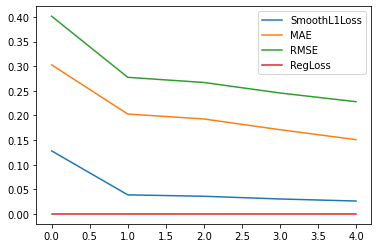

In [34]:
metrics.plot()

WARNING - (py.warnings._showwarnmsg) - /Users/dilaraarif/miniforge3/lib/python3.9/site-packages/neuralprophet/forecaster.py:2060: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(future_df)

WARNING - (py.warnings._showwarnmsg) - /Users/dilaraarif/miniforge3/lib/python3.9/site-packages/neuralprophet/forecaster.py:2060: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(future_df)

WARNING - (py.warnings._showwarnmsg) - /Users/dilaraarif/miniforge3/lib/python3.9/site-packages/neuralprophet/forecaster.py:2060: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(future_df)

WARNING - (py.warnings._showwarnmsg) - /Users/dilaraarif/miniforge3/lib/python3.9/site-packages/neuralprophet/forecaster.py:

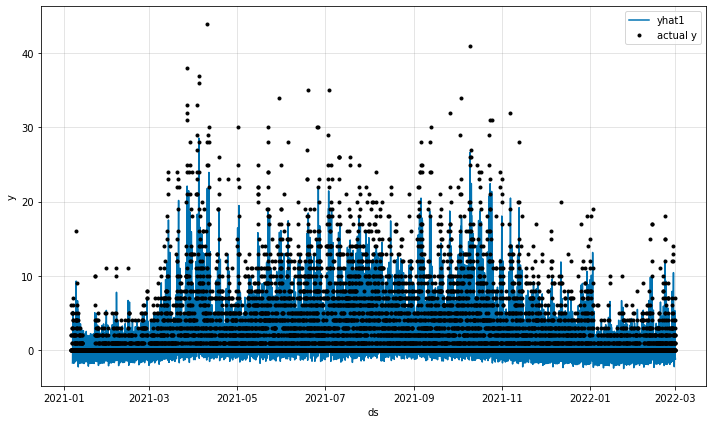

In [27]:
future = m.make_future_dataframe(df_test_dict, n_historic_predictions = True)
forecast = m.predict(future)
fig = m.plot(forecast['31247.0'])

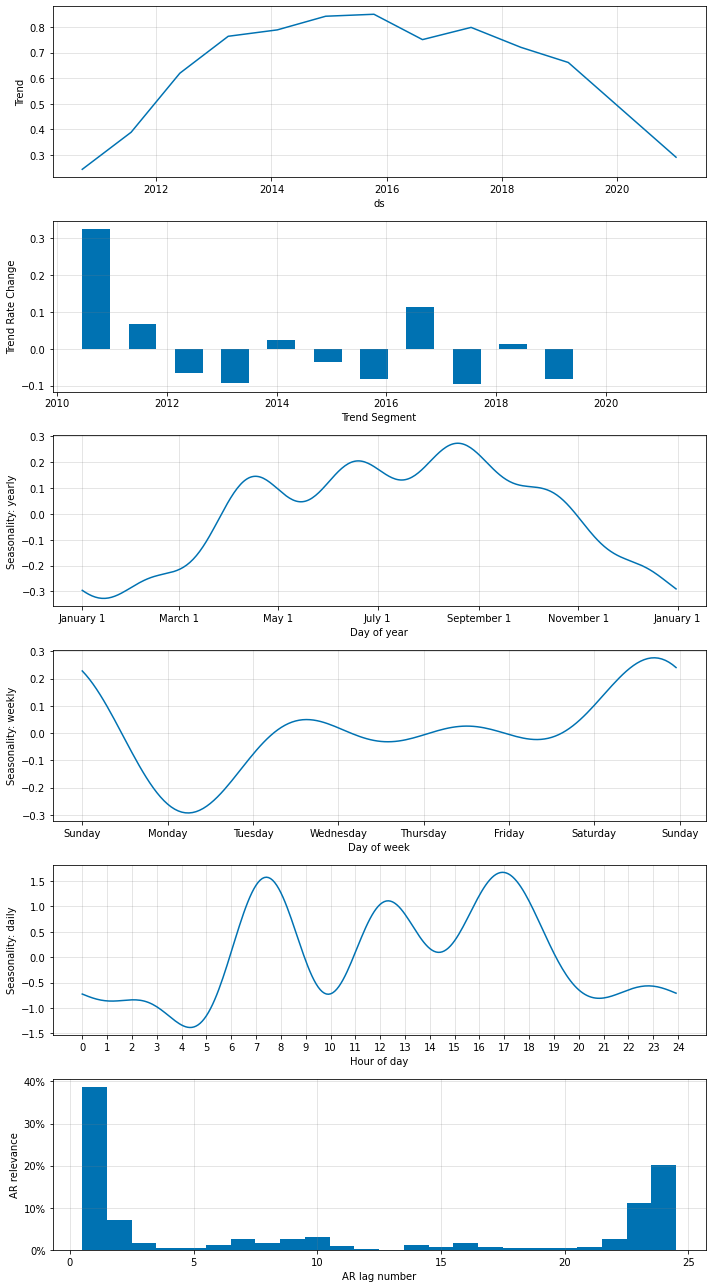

In [28]:
fig_param = m.plot_parameters()

In [ ]:
future2 = m.make_future_dataframe(df_dict, periods=6, n_historic_predictions = True)
forecast2 = m.predict(future2)
fig = m.plot(forecast['31247.0'])

In [30]:
forecast.keys()

dict_keys(['31248.0', '31214.0', '31241.0', '31101.0', '31229.0', '31247.0', '31201.0', '31258.0', '31200.0', '31623.0'])

In [31]:
forecast['31101.0']['yhat1'].sum()

18667.37488411786

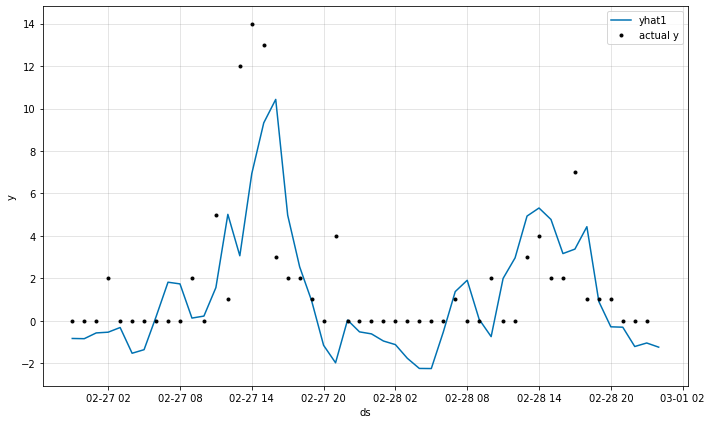

In [35]:
fig = m.plot(forecast['31247.0'][-50:])